# Analítica Avanzada de datos con PySpark

En este notebook haremos recopilación de las funciones más habituales que se utilizan en el análisis y pre-procesamiento de los datos

In [1]:
import findspark

findspark.init()

import pandas as pd
import pyspark

In [2]:
from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Inicio de la sesión de Spark

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName('PySpark_Tutorial') \
    .getOrCreate()

## 1. Lectura de los datos

In [5]:
# Before changing schema
b_data = spark.read.csv(
    r'data/stocks_price_final.csv',
    sep=',',
    header=True,
)

b_data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



#### Cambiar la estructura de datos

In [6]:
from pyspark.sql.types import *

data_schema = [
    StructField('_c0', IntegerType(), True),
    StructField('symbol', StringType(), True),
    StructField('data', DateType(), True),
    StructField('open', DoubleType(), True),
    StructField('high', DoubleType(), True),
    StructField('low', DoubleType(), True),
    StructField('close', DoubleType(), True),
    StructField('volume', IntegerType(), True),
    StructField('adjusted', DoubleType(), True),
    StructField('market.cap', StringType(), True),
    StructField('sector', StringType(), True),
    StructField('industry', StringType(), True),
    StructField('exchange', StringType(), True),
]

final_struc = StructType(fields=data_schema)

In [7]:
data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep=',',
    header=True,
    schema=final_struc
)

In [8]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [9]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [10]:
data = data.withColumnRenamed('market.cap', 'market_cap')

## 2. Inspeccionar los datos
* schema()
* dtypes
* head()
* show()
* first()
* take(n)
* describe()
* columns
* count()
* distinct()
* printSchema()

In [12]:
# prints Schema of thte data
data.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(symbol,StringType,true),StructField(data,DateType,true),StructField(open,DoubleType,true),StructField(high,DoubleType,true),StructField(low,DoubleType,true),StructField(close,DoubleType,true),StructField(volume,IntegerType,true),StructField(adjusted,DoubleType,true),StructField(market_cap,StringType,true),StructField(sector,StringType,true),StructField(industry,StringType,true),StructField(exchange,StringType,true)))

In [13]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market_cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [14]:
data.head(3)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [15]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [16]:
data.first()

Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [17]:
data.describe().show()

+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|summary|              _c0| symbol|              open|              high|               low|             close|            volume|          adjusted|market_cap|          sector|            industry|exchange|
+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|  count|          1729034|1729034|           1726301|           1726301|           1726301|           1726301|           1725207|           1726301|   1729034|         1729034|             1729034| 1729034|
|   mean|         864517.5|   null|15070.071703341047|15555.067268137087|14557.808227578987| 15032.71485433071|1397692.1627885813|14926.109688795501|      null|        

In [18]:
data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [19]:
data.count()

1729034

In [ ]:
data.distinct().count()  #%% md
# Analítica Avanzada de datos con PySpark

En este notebook haremos recopilación de las funciones más habituales que se utilizan en el análisis y pre-procesamiento de los datos

In [ ]:
import findspark

findspark.init()

import pandas as pd
import pyspark

In [ ]:
from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Inicio de la sesión de Spark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName('PySpark_Tutorial') \
    .getOrCreate()

## 1. Lectura de los datos

In [ ]:
# Before changing schema
b_data = spark.read.csv(
    r'data/stocks_price_final.csv',
    sep=',',
    header=True,
)

b_data.printSchema()

#### Cambiar la estructura de datos

In [ ]:
from pyspark.sql.types import *

data_schema = [
    StructField('_c0', IntegerType(), True),
    StructField('symbol', StringType(), True),
    StructField('data', DateType(), True),
    StructField('open', DoubleType(), True),
    StructField('high', DoubleType(), True),
    StructField('low', DoubleType(), True),
    StructField('close', DoubleType(), True),
    StructField('volume', IntegerType(), True),
    StructField('adjusted', DoubleType(), True),
    StructField('market.cap', StringType(), True),
    StructField('sector', StringType(), True),
    StructField('industry', StringType(), True),
    StructField('exchange', StringType(), True),
]

final_struc = StructType(fields=data_schema)

In [ ]:
data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep=',',
    header=True,
    schema=final_struc
)

In [ ]:
data.printSchema()

In [ ]:
data.show(5)

In [ ]:
data = data.withColumnRenamed('market.cap', 'market_cap')

## 2. Inspeccionar los datos
* schema()
* dtypes
* head()
* show()
* first()
* take(n)
* describe()
* columns
* count()
* distinct()
* printSchema()

In [15]:
# prints Schema of thte data
data.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(symbol,StringType,true),StructField(data,DateType,true),StructField(open,DoubleType,true),StructField(high,DoubleType,true),StructField(low,DoubleType,true),StructField(close,DoubleType,true),StructField(volume,IntegerType,true),StructField(adjusted,DoubleType,true),StructField(market_cap,StringType,true),StructField(sector,StringType,true),StructField(industry,StringType,true),StructField(exchange,StringType,true),StructField(date,DateType,true)))

In [ ]:
data.dtypes

In [ ]:
data.head(3)

In [ ]:
data.show(5)

In [ ]:
data.first()

In [ ]:
data.describe().show()

In [ ]:
data.columns

In [ ]:
data.count()

In [ ]:
data.distinct().count()

In [16]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)
 |-- date: date (nullable = true)



## 3. Transformación de columnas
* Añadir columnas
* Modificar columnas existentes
* Eliminar columnas

In [18]:
data = data.withColumn('date', data.data)

data.show(5)

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)
 |-- date: date (nullable = true)



In [ ]:
data = data.withColumnRenamed('date', 'data_changed')

data.show(5)

In [ ]:
data = data.drop('data_changed')

data.show(5)

## 4. Imputando datos faltantes

In [ ]:
# Remove Rows with Missing Values
data.na.drop()

# Replacing Missing Values with Mean
data.na.fill(data.select(f.mean(data['open'])).collect()[0][0])

# Replacing Missing Values with new values
data.na.replace(old_value, new_vallue)

## 5. Selección de datos con PySpark SQL
* Select
* Filter
* Between
* When
* Like
* GroupBy
* Aggregations

### Select

In [19]:
data.select(['open', 'high', 'low', 'close', 'volume', 'adjusted']).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              open|              high|               low|             close|            volume|          adjusted|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|           1726301|           1726301|           1726301|           1726301|           1725207|           1726301|
|   mean|15070.071703341051| 15555.06726813709|14557.808227578987| 15032.71485433071|1397692.1627885813|14926.109688795501|
| stddev|1111821.8002863203|1148247.1953514954|1072968.1558434262|1109755.9294000624| 5187522.908169105|1101877.6328940126|
|    min|             0.072|             0.078|             0.052|             0.071|                 0|         -1.230099|
|    max|      1.60168176E8|      1.61601456E8|      1.55151728E8|      1.58376592E8|         656504200|      1.57249392E8|
+-------

### Filter

In [20]:
from pyspark.sql.functions import col, lit

data.filter((col('data') >= lit('2020-01-01'))
            & (col('data') <= lit('2020-01-31'))).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+----------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-02|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-03|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-06|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology

### Between

In [22]:
data.printSchema()
data.filter(data.adjusted.between(100.0, 500.0)).show(5)

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)
 |-- date: date (nullable = true)

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+----------+
| _c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|      date|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+----------+
|  93|   T

### When

In [23]:
data.select('open', 'close',
            f.when(data.adjusted >= 200.0, 1).otherwise(0)).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



### Like

In [24]:
data.select('sector',
            data.sector.rlike('^[B,C]').alias('Sector Starting with B or C')
            ).distinct().show()

+--------------------+---------------------------+
|              sector|Sector Starting with B or C|
+--------------------+---------------------------+
|         Health Care|                      false|
|       Capital Goods|                       true|
|Consumer Non-Dura...|                       true|
|    Public Utilities|                      false|
|   Consumer Durables|                       true|
|             Finance|                      false|
|      Transportation|                      false|
|       Miscellaneous|                      false|
|   Consumer Services|                       true|
|              Energy|                      false|
|    Basic Industries|                       true|
|          Technology|                      false|
+--------------------+---------------------------+



### GroupBy

In [26]:
data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().show(5)

+--------------------+-----------------+------------------+------------------+
|            industry|        avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+-----------------+------------------+------------------+
|Finance/Investors...|5.134401785714288| 5.136630739795919| 4.991354066964286|
|       Miscellaneous|16.38588266938775|16.359879090306126|16.148959322959186|
|Biotechnology: Bi...|24.80808319232426|24.803587149935417| 24.74507997827317|
|Other Specialty S...|84.80718810562857|  84.8027655092983| 84.55525036482354|
|Biotechnology: El...|33.36891734535046| 33.33611913546896| 33.21022605613575|
+--------------------+-----------------+------------------+------------------+
only showing top 5 rows



### Agregation

In [28]:
from pyspark.sql.functions import col, min, max, avg, lit

data.groupBy("sector") \
    .agg(min("data").alias("From"),
         max("data").alias("To"),

         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"),
         avg("open").alias("Average Opening"),

         min("close").alias("Minimum Closing"),
         max("close").alias("Maximum Closing"),
         avg("close").alias("Average Closing"),

         min("adjusted").alias("Minimum Adjusted Closing"),
         max("adjusted").alias("Maximum Adjusted Closing"),
         avg("adjusted").alias("Average Adjusted Closing"),

         ).show(5)

+--------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|              sector|      From|        To|Minimum Opening|Maximum Opening|   Average Opening|Minimum Closing|Maximum Closing|   Average Closing|Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+--------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|       Miscellaneous|2019-01-02|2020-07-22|          0.147|     1059.98999|52.038394969006596|         0.1361|    1035.829956|52.063628549509644|                  0.1361|             1035.829956|       51.80973033632301|
|         Health Care|2019-01-02|2020-07-22|          0.072|       186000.0|119.96763306523246|          0.071| 

Obtenga los datos mínimos, máximos y promedio de los sectores de **enero de 2019** a **enero de 2020**

In [29]:
data.filter((col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31'))) \
    .groupBy("sector") \
    .agg(min("data").alias("From"),
         max("data").alias("To"),

         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"),
         avg("open").alias("Average Opening"),

         min("close").alias("Minimum Closing"),
         max("close").alias("Maximum Closing"),
         avg("close").alias("Average Closing"),

         min("adjusted").alias("Minimum Adjusted Closing"),
         max("adjusted").alias("Maximum Adjusted Closing"),
         avg("adjusted").alias("Average Adjusted Closing"),

         ).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16           |690.0          |51.51619596530087 |0.16           |691.099976     |51.54953412269036 |0.16                    |691.099976              |51.21050733851895       |
|Health Care          |2019-01-02|2020-01-31|0.072          |186000.0       |146.7756197567624 |0.071       

In [ ]:
spark.sql("select * from temp_table where adjusted = 500").show()

## 6. Visualización de datos

In [30]:
sec_df = data.select(['sector', 'open', 'close', 'adjusted']).groupBy('sector').mean().toPandas()

In [31]:
sec_df

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
6,Basic Industries,266410.354701,265750.361367,263865.510703
7,Capital Goods,60.488544,60.516555,59.975123
8,Technology,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878


<Axes: xlabel='sector'>

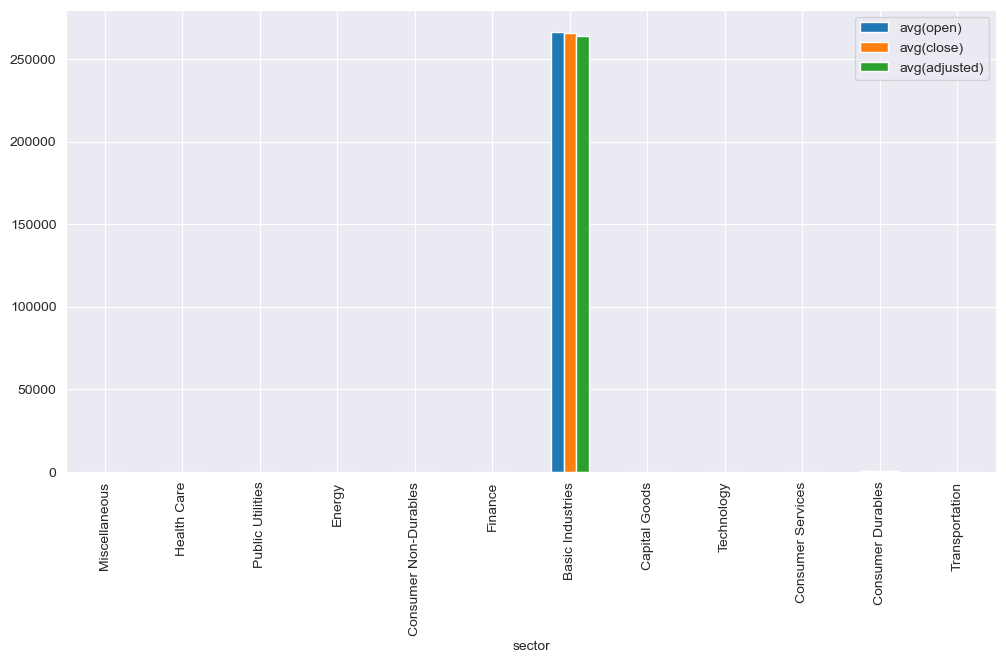

In [32]:
sec_df.plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:], figsize=(12, 6))

# Explanation
# kind='bar': especifica que el tipo de gráfico que se creará es un gráfico de barras.

# x='sector': especifica que la columna 'sector' del DataFrame se utilizará como la variable independiente en el gráfico de barras, lo que significa que las barras estarán etiquetadas según los valores en esta columna.

# y=sec_df.columns.tolist()[1:]: especifica las columnas del DataFrame que se utilizarán como variables dependientes en el gráfico de barras. En este caso, se utiliza la lista de todas las columnas del DataFrame a partir de la segunda columna. Esto se logra mediante el método tolist() de la propiedad columns del DataFrame, que devuelve una lista de todas las columnas del DataFrame, y el operador de rebanado [1:], que selecciona todas las columnas a partir de la segunda columna.

# figsize=(12, 6): especifica el tamaño de la figura del gráfico en pulgadas. En este caso, la figura tendrá una anchura de 12 pulgadas y una altura de 6 pulgadas.

Elimine algunas de las **industrias básicas** y véala de nuevo

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


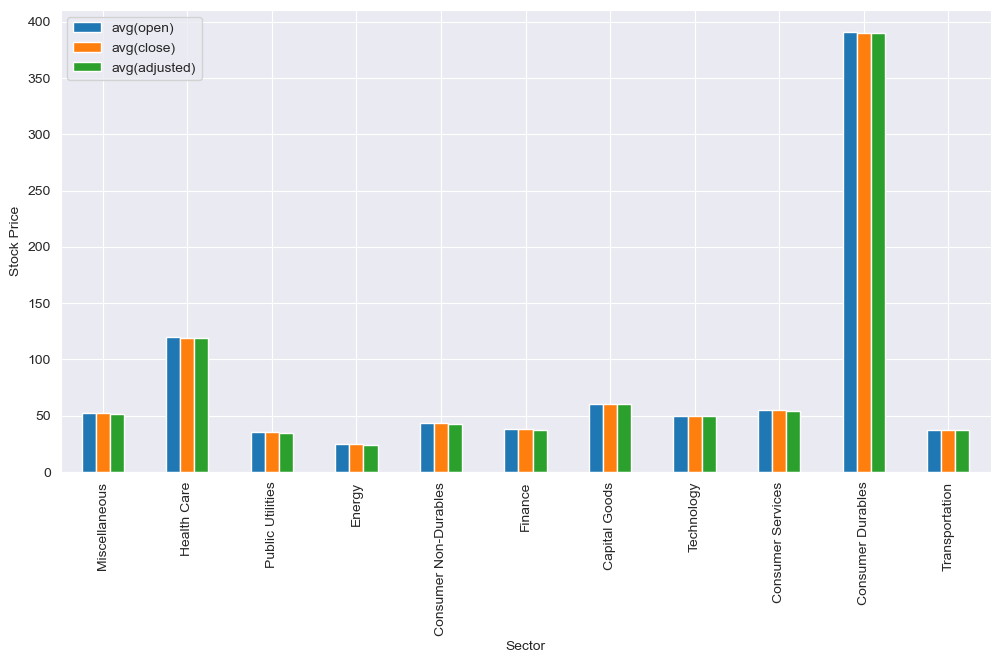

In [34]:
ind = list(range(12))
ind.pop(6)
sec_df.iloc[ind, :].plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:], figsize=(12, 6),
                         ylabel='Stock Price', xlabel='Sector')
# iloc explanation
# En la línea de código en cuestión, iloc[ind, :] selecciona todas las columnas de la fila indicada por ind, donde ind es una variable que contiene una lista de índices enteros que se utiliza para seleccionar una fila específica del DataFrame.

plt.show()

In [35]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

industries_x.head()

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Biotechnology: Biological Products (No Diagnos...,24.808083,24.803587,24.745080
3,Other Specialty Stores,84.807188,84.802766,84.555250
4,Biotechnology: Electromedical & Electrotherape...,33.368917,33.336119,33.210226


<Axes: ylabel='industry'>

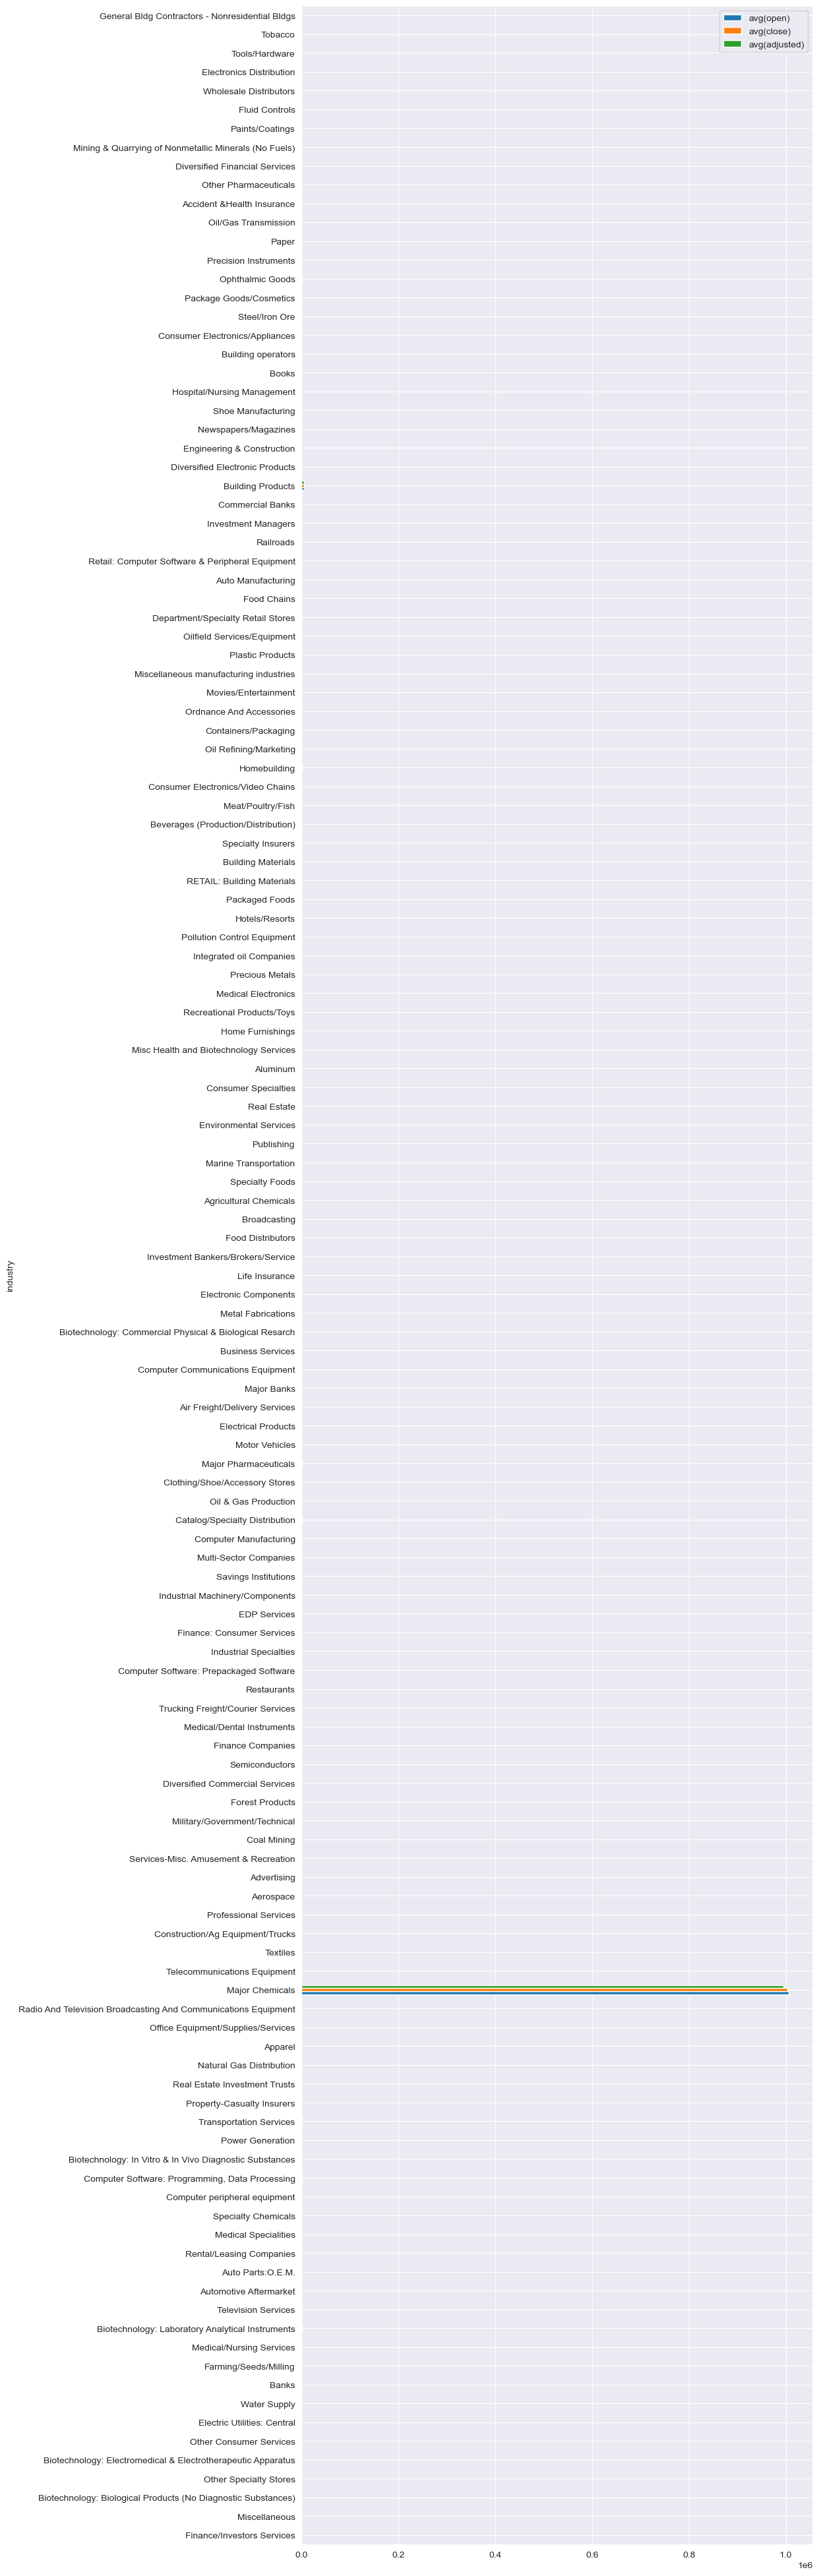

In [36]:
industries_x.plot(kind='barh', x='industry',
                  y=industries_x.columns.tolist()[1:], figsize=(10, 50))

Elimine **sustancias químicas importantes** y **productos de construcción** para ver los datos restantes con claridad

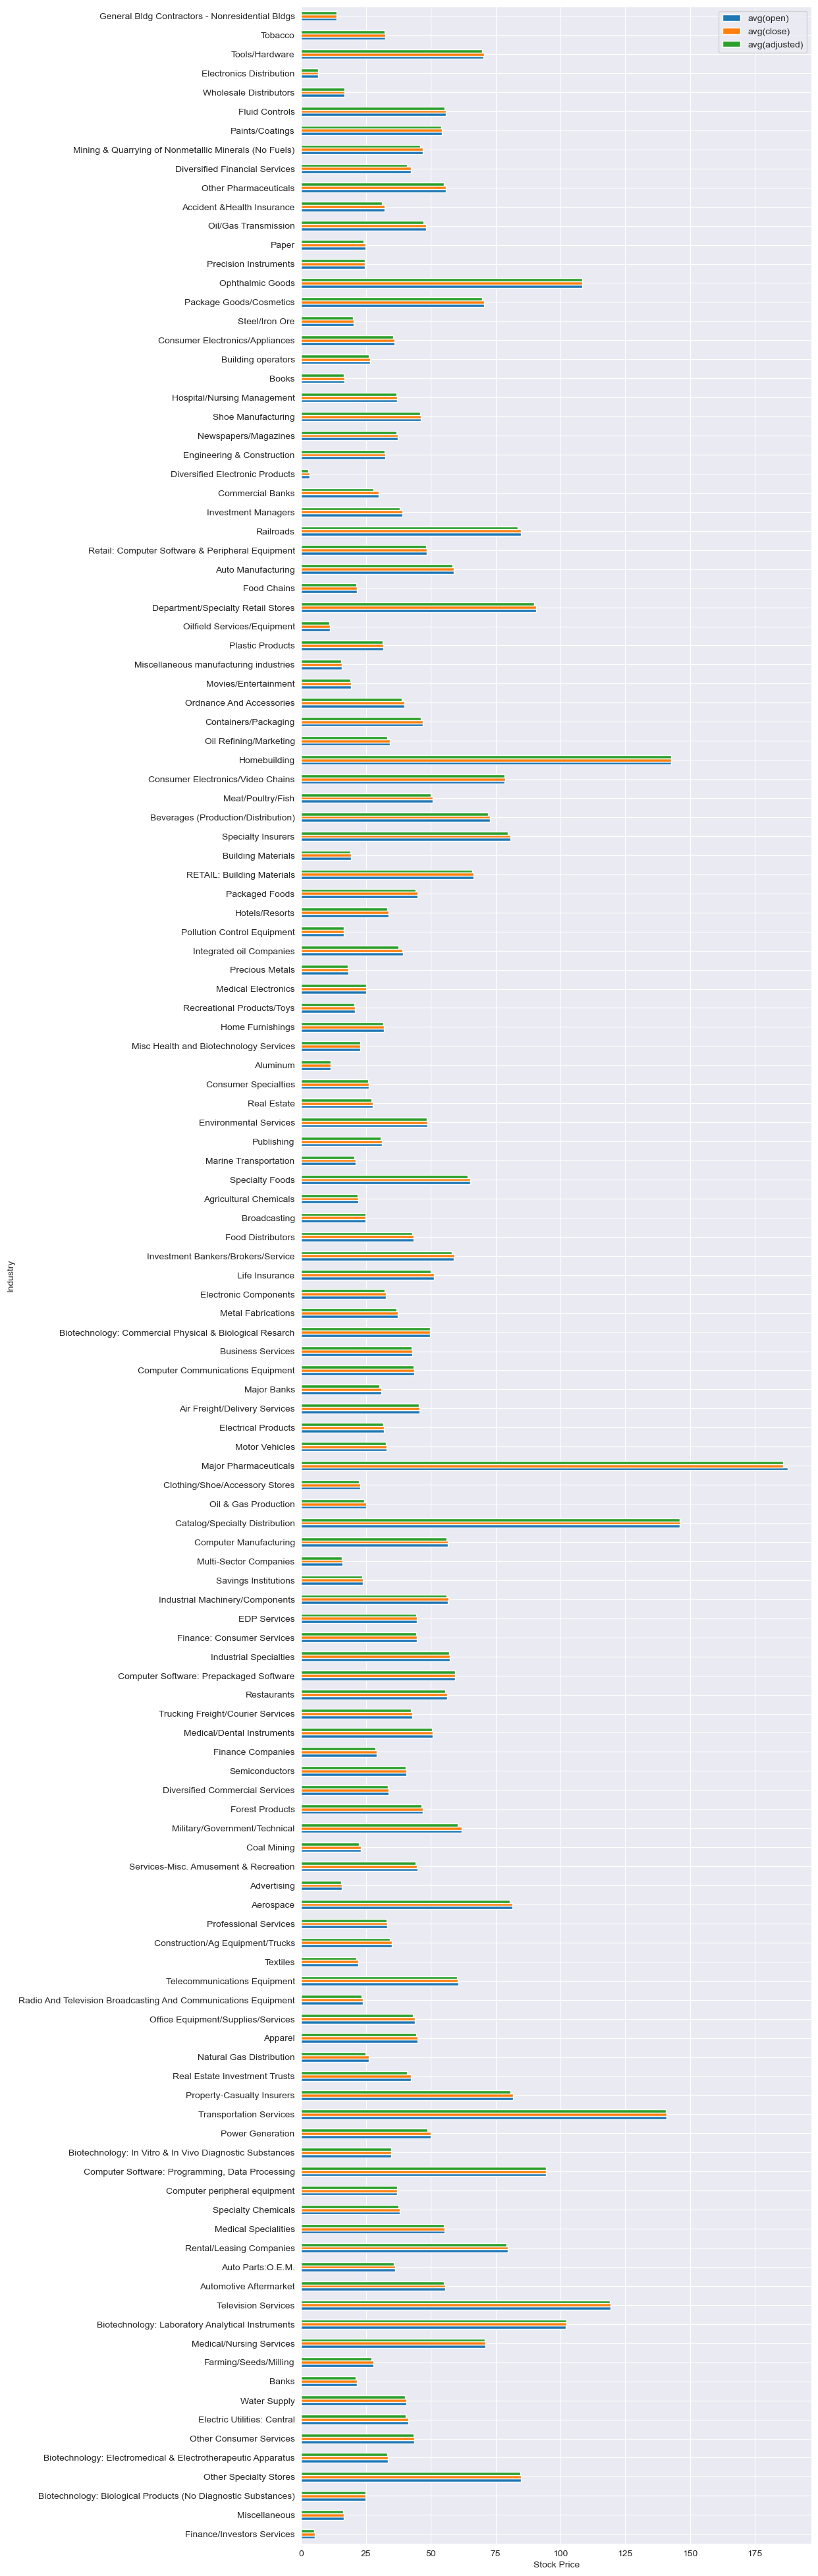

In [37]:
q = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]

# Con filter:
# q = industries_x.filter((industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products'))

# Con where:
# q = industries_x.where((industries_x.industry != 'Major Chemicals') & (industries

q.plot(kind='barh', x='industry', y=q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel='Industry')

plt.show()

In [38]:
tech = data.where(col('sector') == 'Technology').select('data', 'open', 'close', 'adjusted')

tech.show()

+----------+----+-----+--------+
|      data|open|close|adjusted|
+----------+----+-----+--------+
|2019-01-02|8.51| 8.55|    8.55|
|2019-01-03| 8.5| 8.59|    8.59|
|2019-01-04|8.72| 8.88|    8.88|
|2019-01-07|8.88| 8.86|    8.86|
|2019-01-08|8.93|  9.4|     9.4|
|2019-01-09|9.46| 9.43|    9.43|
|2019-01-10|9.41|  9.4|     9.4|
|2019-01-11|9.37| 9.51|    9.51|
|2019-01-14|9.45| 9.48|    9.48|
|2019-01-15| 9.5| 9.52|    9.52|
|2019-01-16|9.53| 9.52|    9.52|
|2019-01-17|9.22|  9.5|     9.5|
|2019-01-18|9.57| 9.41|    9.41|
|2019-01-22|9.31|  8.9|     8.9|
|2019-01-23|8.93| 8.83|    8.83|
|2019-01-24|8.84| 8.73|    8.73|
|2019-01-25| 8.8| 8.93|    8.93|
|2019-01-28|8.87| 8.83|    8.83|
|2019-01-29|8.82| 8.83|    8.83|
|2019-01-30| 8.9| 8.74|    8.74|
+----------+----+-----+--------+
only showing top 20 rows



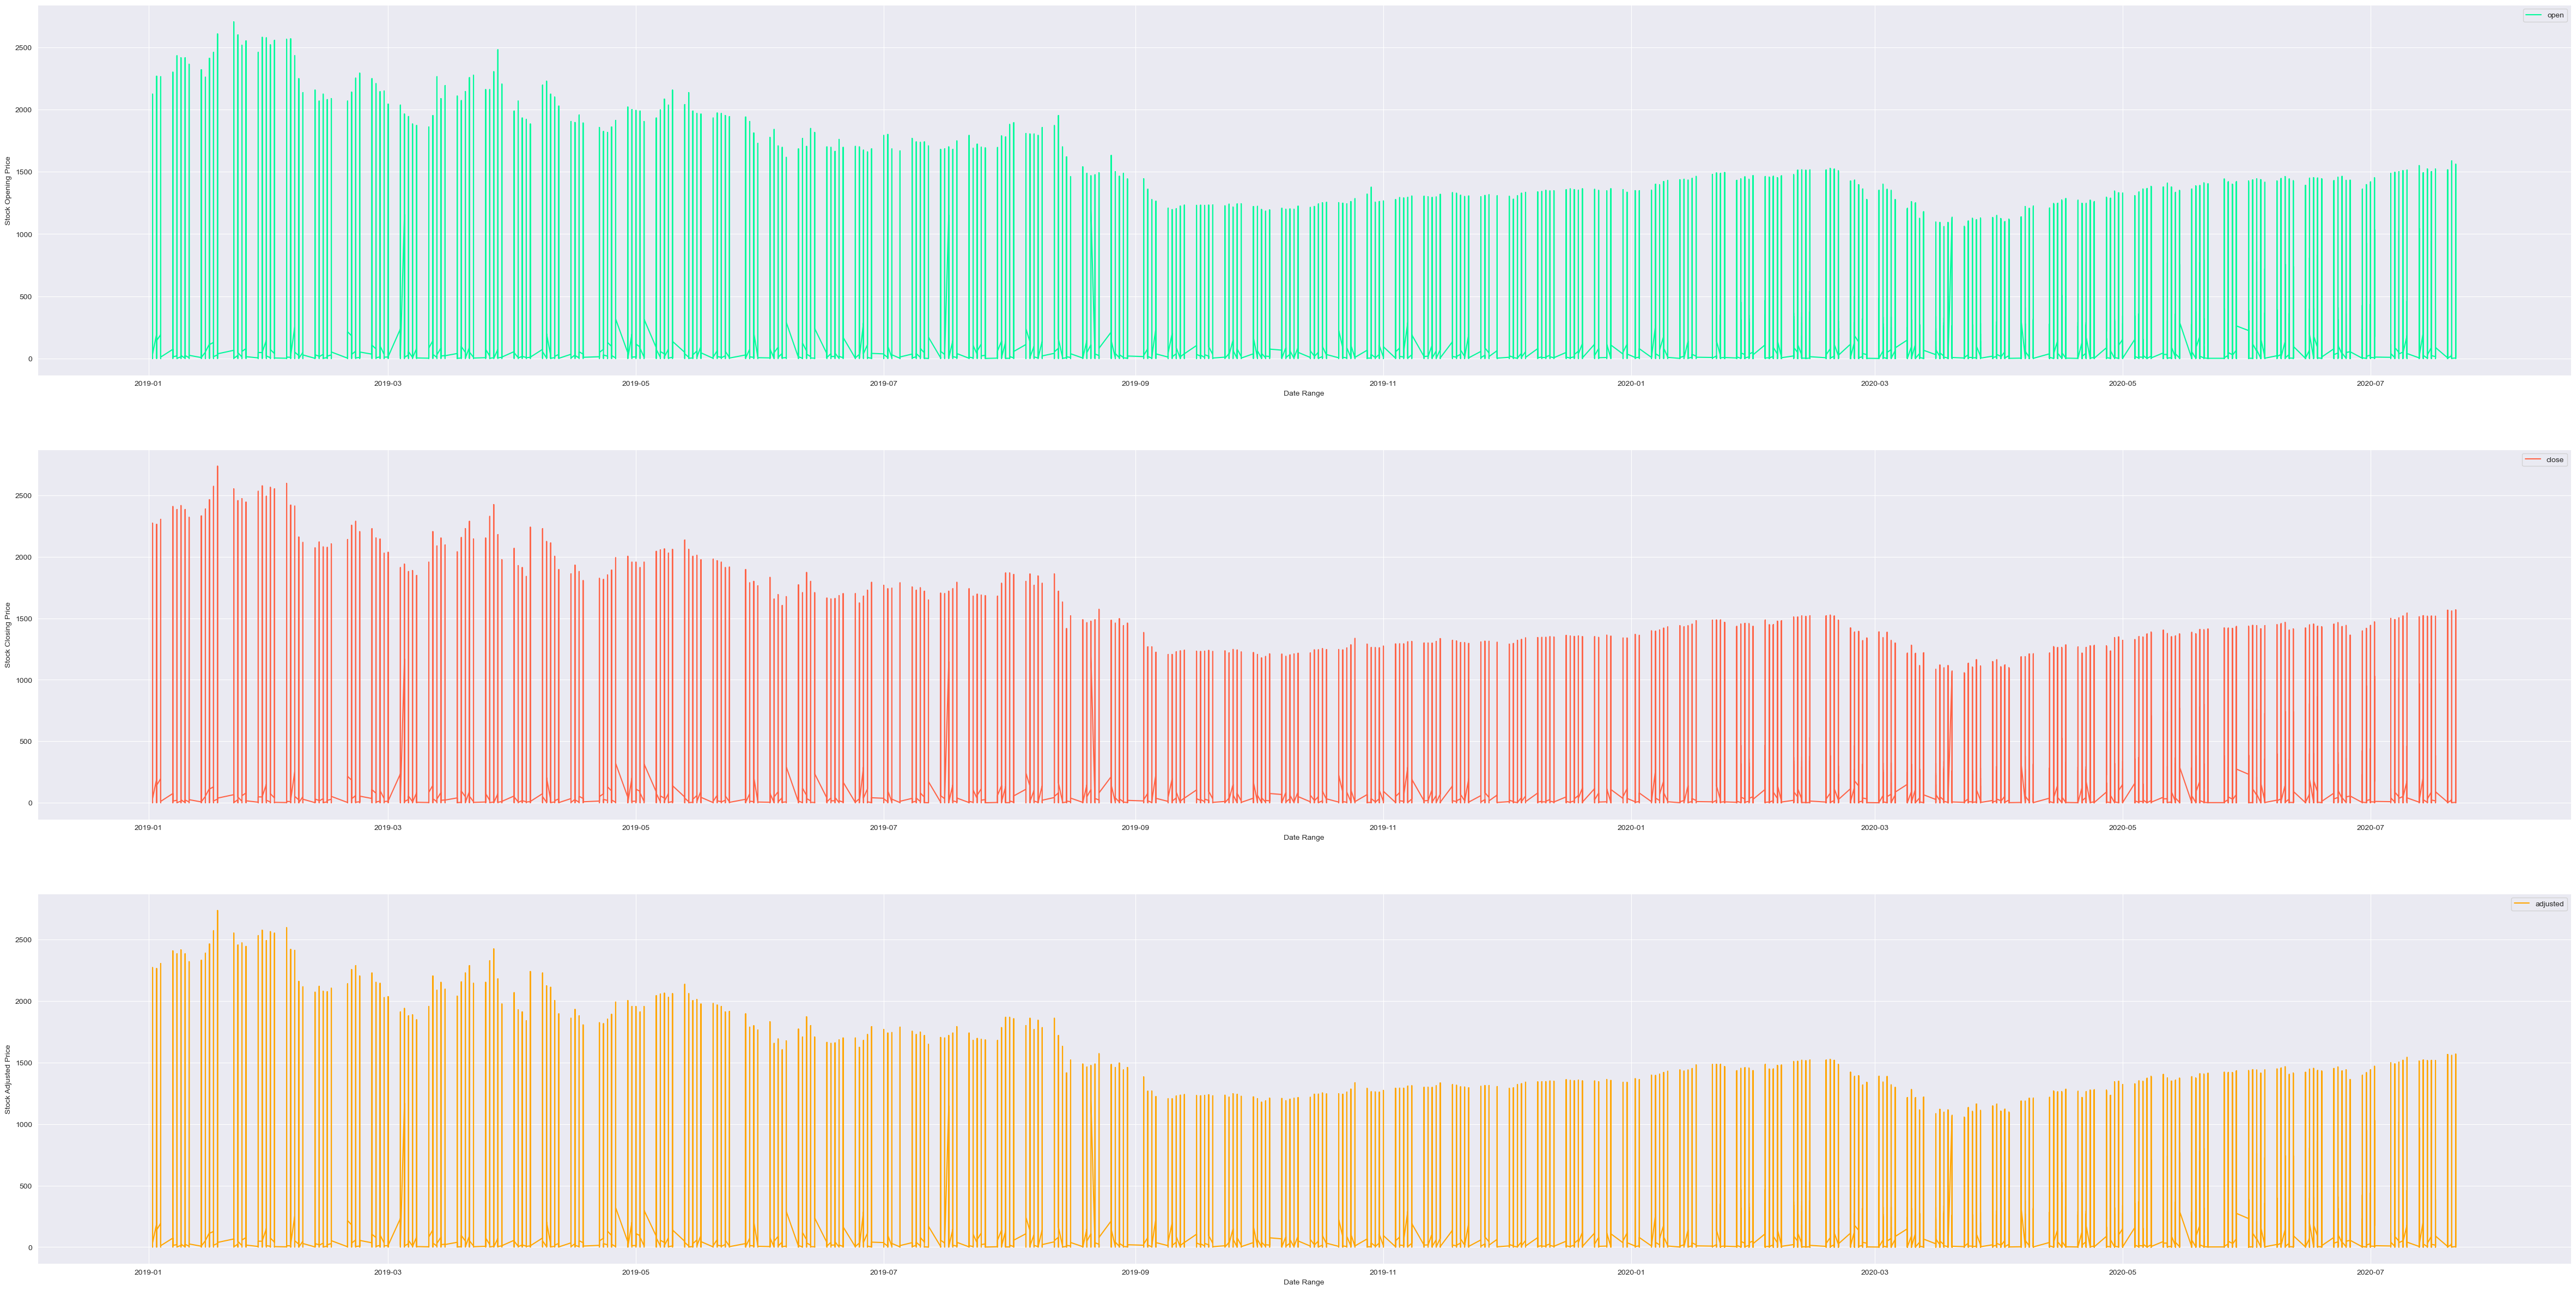

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(60, 30))
# Explanation:
# Esta línea de código crea una figura y un conjunto de subplots, que son áreas en la figura donde se pueden trazar gráficos. La figura se puede pensar como una ventana o lienzo en la que se dibujan los subplots.

# En particular, esta línea crea una figura con 3 filas (nrows=3) y 1 columna (ncols=1), es decir, un arreglo de subplots con tres gráficos apilados verticalmente. El argumento figsize=(60, 30) establece el tamaño de la figura en pulgadas, con una anchura de 60 y una altura de 30.

# La función subplots devuelve dos objetos: el primer objeto es la figura en sí, mientras que el segundo es una matriz (axes) que contiene los subplots. En este caso, como hay 3 filas y 1 columna, la matriz tiene una forma de (3, 1), lo que significa que hay tres subplots.

# Estos objetos se pueden usar para trazar gráficos en cada subplot, ya sea usando matplotlib o cualquier otra librería de visualización de datos.

tech.toPandas().plot(kind='line', x='data', y='open', xlabel='Date Range', ylabel='Stock Opening Price', ax=axes[0],
                     color='mediumspringgreen')

tech.toPandas().plot(kind='line', x='data', y='close', xlabel='Date Range', ylabel='Stock Closing Price', ax=axes[1],
                     color='tomato')

tech.toPandas().plot(kind='line', x='data', y='adjusted', xlabel='Date Range', ylabel='Stock Adjusted Price',
                     ax=axes[2], color='orange')

plt.show()

## 7. Leer y guardar de datos en archivos

In [40]:
## Writing entire data to different file formats

# CSV
data.write.csv('dataset.csv')

# JSON
data.write.save('dataset.json', format='json')

# Parquet
data.write.save('dataset.parquet', format='parquet')

## Writing selected data to different file formats

# CSV
data.select(['data', 'open', 'close', 'adjusted']) \
    .write.csv('dataset.csv')

# JSON
data.select(['data', 'open', 'close', 'adjusted']) \
    .write.save('dataset.json', format='json')

# Parquet
data.select(['data', 'open', 'close', 'adjusted']) \
    .write.save('dataset.parquet', format='parquet')  #%%
data.printSchema()

AnalysisException: path file:/B:/OneDrive/Coding/Python/Courses/PySpark/big-data-apache-spark-3-python-cero-experto/Entrega/dataset.csv already exists.